<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acknowledgements</a></span></li><li><span><a href="#Words-indicative-of-(5-star)-and-(1-star)-reviews" data-toc-modified-id="Words-indicative-of-(5-star)-and-(1-star)-reviews-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Words indicative of (5-star) and (1-star) reviews</a></span><ul class="toc-item"><li><span><a href="#Topics-indicative-of-5-star-reviews" data-toc-modified-id="Topics-indicative-of-5-star-reviews-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Topics indicative of 5-star reviews</a></span></li><li><span><a href="#Topics-indicative-of-1-star-reviews" data-toc-modified-id="Topics-indicative-of-1-star-reviews-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Topics indicative of 1-star reviews</a></span></li></ul></li></ul></div>

# Acknowledgements 
Thank you to 
https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

# Words indicative of (5-star) and (1-star) reviews

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import the stop word list


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daviderickson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def load_reviews(size='small'): 
    if size == 'small':
        filename = r'../../data/small-review.json'
    elif size == 'intermediate':
        filename = r'../../data/intermediate-review.json'
    elif size == 'full':
        filename = r'../../data/review.json'
    new_list = []
    for line in open(filename):
       new_list.append(json.loads(line))
    return pd.DataFrame.from_records(new_list)

dfreviews = load_reviews(size='intermediate')

In [3]:
dfreviews['text'][0]

'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'

In [4]:
# For simplicity, drop anything that isn't a letter
# Numbers and symbols may have interesting meaning and could be explore later

def lettersOnly(string):
    return re.sub("[^a-zA-Z]", " ", string) 

dfreviews['text'] = dfreviews['text'].apply(lettersOnly)


In [5]:
dfreviews['text'][0]

'Total bill for this horrible service  Over   Gs  These crooks actually had the nerve to charge us     for   pills  I checked online the pills can be had for    cents EACH  Avoid Hospital ERs at all costs '

In [6]:
def review_to_words(string):
    string = re.sub("[^a-zA-Z]", " ", string) # keep only letters. more complex model possible later
    words =  string.lower().split() # make everything lowercase. split into words
    stops = set(stopwords.words('english')) # create a fast lookup for stopwords
    words = [w for w in words if not w in stops] # remove stopwords
    return( " ".join( words )) # recombine review and return
    
# dfreviews['text'] = dfreviews['text'].apply(review_to_words) # apply to reviews in dataframe


In [7]:
dfreviews['text'] = dfreviews['text'].apply(review_to_words)

In [8]:
dfreviews['text'][0]

'total bill horrible service gs crooks actually nerve charge us pills checked online pills cents avoid hospital ers costs'

In [9]:
print("Creating the TFIDF...\n")
from sklearn.feature_extraction.text import TfidfVectorizer

no_features = 1000

# Initialize the "TfidfVectorizer" object, which is scikit-learn's
# term frequency, inverse document frequency (TFIDF) tool.  
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df=15, \
                             analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = no_features) # 5000

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf = tfidf_vectorizer.fit_transform(dfreviews['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfidf = tfidf.toarray()

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

Creating the TFIDF...



In [10]:
print("Creating the bag of words for LDA...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# tf bag of words tool.  
tf_vectorizer = CountVectorizer(max_df = 0.95, min_df=15, \
                             analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = no_features) # 5000

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tf = tf_vectorizer.fit_transform(dfreviews['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
tf = tf.toarray()

tf_feature_names = tf_vectorizer.get_feature_names()

Creating the bag of words for LDA...



In [11]:
print(tfidf.shape)
print(tf.shape)

(100000, 1000)
(100000, 1000)


In [12]:
# Take a look at the words in the vocabulary
print(tfidf_feature_names)
print(tf_feature_names)

['able', 'absolutely', 'accommodating', 'across', 'actually', 'add', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'air', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amazing', 'ambiance', 'amount', 'another', 'answer', 'anyone', 'anything', 'anyway', 'anywhere', 'apparently', 'appetizer', 'appetizers', 'apple', 'appointment', 'appreciate', 'area', 'around', 'arrived', 'asian', 'ask', 'asked', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avoid', 'away', 'awesome', 'awful', 'baby', 'back', 'bacon', 'bad', 'bag', 'baked', 'bar', 'bartender', 'based', 'basically', 'bathroom', 'bbq', 'beans', 'beautiful', 'bed', 'beef', 'beer', 'beers', 'behind', 'believe', 'best', 'better', 'beyond', 'big', 'bill', 'birthday', 'bit', 'bite', 'black', 'bland', 'blue', 'book', 'bottle', 'bottom', 'bought', 'bowl', 'box', 'boyfriend', 'bread', 'breakfast', 'bring', 'brisket', 'brought', 'brunch', 'buffet', 'building'

In [13]:
no_topics = 30 

from sklearn.decomposition import NMF, LatentDirichletAllocation

# Run NMF
print('Running NMF...')
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
print('Finished NMF')

# Run LDA
print('Running LDA...')
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print('Finished LDA')

Running NMF...
Finished NMF
Running LDA...
Finished LDA


In [14]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
one places favorite two location many restaurants thing star different
Topic 1:
would said told could never called work call day even
Topic 2:
great atmosphere awesome job experience prices price selection spot service
Topic 3:
food restaurant mexican quality eat chinese fast better authentic buffet
Topic 4:
delicious ordered menu salad sauce restaurant fresh cheese lunch also
Topic 5:
pizza crust cheese toppings sauce delivery wings thin order garlic
Topic 6:
always love favorite years never every times coming come location
Topic 7:
good pretty prices price overall selection little though service bit
Topic 8:
chicken fried rice sauce ordered salad curry spicy wings thai
Topic 9:
staff friendly helpful clean super dr nice knowledgeable office location
Topic 10:
best ever town hands far vegas years life part valley
Topic 11:
vegas room hotel las stay rooms strip show pool clean
Topic 12:
service customer excellent slow fast horrible quick location poor terrible
Topic 13:
place 

## Topics indicative of 5-star reviews

In [15]:
# Want to understand words predictive of 5-star reviews
# Make a label that is 5-star and build a model to predict
ydata = (dfreviews['stars'] == 5)
ydata.head()

0    False
1     True
2     True
3     True
4    False
Name: stars, dtype: bool

In [16]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
lda_trans = lda.transform(tf)
forest = forest.fit( lda_trans, ydata )

Training the random forest...


In [17]:
def return_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
#         print("Topic %d:" % (topic_idx))
        topics.append(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics


topicImportances = pd.DataFrame(data=zip(return_topics(lda, tf_feature_names, no_top_words), 
                                         forest.feature_importances_), columns=['Topic', 'Importance'])
topicImportances.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)
topicImportances.head()

,Topic,Importance
4,amazing place great recommend friendly staff a...,0.110973
18,great service food excellent friendly good sta...,0.059372
9,service order customer food wait minutes line ...,0.052385
27,work service would business company done job r...,0.050987
16,said told back would asked get called could go...,0.044114


In [22]:
wordImportances = pd.DataFrame(data=zip(tf_feature_names, forest.feature_importances_), columns=['Word', 'Importance'])
wordImportances.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)

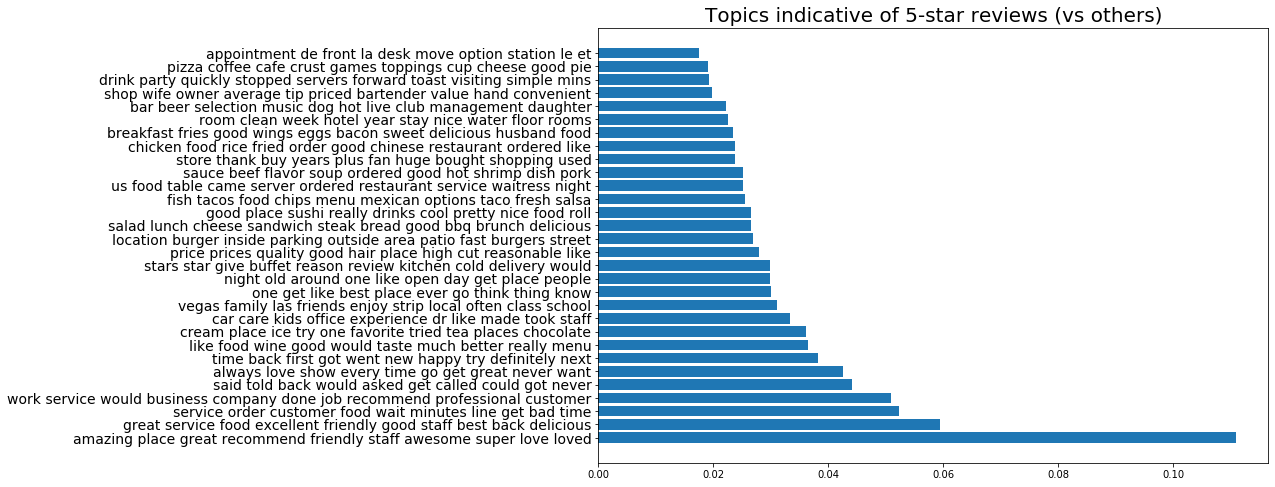

In [23]:
plt.figure(figsize=(12,8))
plt.barh(y='Topic', width='Importance', data=topicImportances[:30]);
plt.yticks(rotation='horizontal', fontsize=14);
plt.title('Topics indicative of 5-star reviews (vs others)', fontsize=20);

In [24]:
wordImportances.head(10)

,Word,Importance
4,actually,0.110973
18,always,0.059372
9,ago,0.052385
27,anywhere,0.050987
16,also,0.044114
13,alone,0.042543
17,although,0.038128
11,air,0.036532
15,already,0.036140
23,answer,0.033403


## Topics indicative of 1-star reviews

In [ ]:
# Want to understand words predictive of 5-star reviews
# Make a label that is 5-star and build a model to predict
ydata1 = (dfreviews['stars'] == 1)
ydata1.head()

In [ ]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest1 = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest1 = forest1.fit( train_data_features, ydata1 )

In [ ]:
wordImportances1 = pd.DataFrame(data=zip(vocab, forest1.feature_importances_), columns=['Word', 'Importance'])
wordImportances1.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(y='Word', width='Importance', data=wordImportances1[:30]);
plt.yticks(rotation='horizontal', fontsize=14);
plt.title('Words indicative of 1-star reviews (vs others)', fontsize=20);

In [ ]:
df_wI5_wI1 = wordImportances.merge(wordImportances1, how='outer', on='Word', suffixes=('_5star', '_1star'))

In [ ]:
df_wI5_wI1.sort_values(by=['Importance_5star'], axis=0, ascending=False, inplace=True)
df_wI5_wI1.head()

In [ ]:

df_wI5_wI1[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)

In [ ]:
df_wI5_wI1['Word'][:30]

In [ ]:

df_wI5_wI1.sort_values(by='Importance_1star', ascending=False)[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)

In [ ]:
df_wI5_wI1['Importance_5x1'] = df_wI5_wI1['Importance_1star'] * df_wI5_wI1['Importance_5star']

In [ ]:

df_wI5_wI1.sort_values(by='Importance_5x1', ascending=False)[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)